In [2]:
"""
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install h5py pyyaml
!pip install tf_nightly
!pip install tensorboardcolab
"""

import matplotlib.pyplot as plt
import numpy as np
import PIL
from scipy.misc import imsave
#from google.colab import drive
#drive.mount('/content/gdrive')
from PIL import Image
from statistics import stdev 
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
#from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

Using TensorFlow backend.


In [ ]:
#Splitting of the data

#Training data
Xtr = np.ndarray((198,128,128,1))
Ytr = np.ndarray((198,128,128,4)) #to comment into 1hot encoding

#Validation Data
Xva = np.ndarray((25,128,128,1))
Yva = np.ndarray((25,128,128,4))
#Testing Data
Xtest = np.ndarray((22,128,128,1))
Ytest = np.ndarray((22,128,128,4))
for i in range (1,154):
    if i <10:
        im = Image.open("Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        #mask = np.reshape(np.array(mask),(128,128,1))
        mask = to_categorical(np.array(mask))
        Xtr[i][:][:][:] = im
        Ytr[i][:][:][:] = mask
  
    elif (i>=10) and (i<100):
        im = Image.open("Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        Xtr[i][:][:][:] = im
        Ytr[i][:][:][:] = mask
    
    elif (i>=100):
        if (i == 122):
            continue;
        im = Image.open("Converted_Images_PNG/JPCLN%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        Xtr[i][:][:][:] = im
        Ytr[i][:][:][:] = mask
    
    
for i in range(1,94):   
    if i <10:
        im = Image.open("Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        Xtr[i][:][:][:] = im
        Ytr[i][:][:][:] = mask

    elif (i>=10):
        im = Image.open("Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        if i<47:
            Xtr[i][:][:][:] = im
            Ytr[i][:][:][:] = mask
        elif 46<i<72:
            Xva[i-47][:][:][:] = im
            Yva[i-47][:][:][:] = mask
        elif 71<i<94:
            Xtest[i-72][:][:][:] = im
            Ytest[i-72][:][:][:] = mask

In [ ]:
plt.imshow(np.reshape(Xtest[1][:][:][:],(128,128)))
print(np.reshape(Xtest[1][:][:][:],(128,128)))

In [3]:
#Osheen Part
#Splitting the data randomly 
from sklearn.model_selection import train_test_split


#Splitting of the data

X = np.ndarray((246,128,128,1))
Y = np.ndarray((246,128,128,4))

for i in range (1,154):
    if i <10:
        im = Image.open("Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10) and (i<100):
        im = Image.open("Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=100):
        if (i == 122):
            continue;
        im = Image.open("Converted_Images_PNG/JPCLN%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCLN%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask


for i in range(1,94):   
    if i <10:
        im = Image.open("Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10):
        im = Image.open("Converted_Images_PNG/JPCNN0%s.PNG" % (i))
        mask = Image.open("Merged_Masks_PNG/JPCNN0%s.PNG" % (i))
        #im = Image.open("gdrive/My Drive/Deep Learning Project/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        #mask = Image.open("gdrive/My Drive/Deep Learning Project/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        if i<47:
            X[i][:][:][:] = im
            Y[i][:][:][:] = mask
        elif 46<i<72:
            X[i-47][:][:][:] = im
            Y[i-47][:][:][:] = mask
        elif 71<i<94:
            X[i-72][:][:][:] = im
            Y[i-72][:][:][:] = mask

    
#Splitting of data into training, validation and testing
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10)
Xtr, Xva, Ytr, Yva = train_test_split(Xtr, Ytr, test_size=0.10)


#Printing shape of Training and Test data
print( Xtr.shape, Ytr.shape)
print( Xtst.shape, Ytst.shape)
print(Xva.shape, Yva.shape)

(198, 128, 128, 1) (198, 128, 128, 4)
(25, 128, 128, 1) (25, 128, 128, 4)
(23, 128, 128, 1) (23, 128, 128, 4)


[[105. 145. 156. ... 186. 187. 168.]
 [125. 173. 185. ... 220. 222. 199.]
 [117. 159. 164. ... 219. 221. 199.]
 ...
 [127. 179. 194. ... 162. 170. 182.]
 [127. 179. 194. ... 166. 175. 184.]
 [107. 151. 164. ... 147. 156. 157.]]


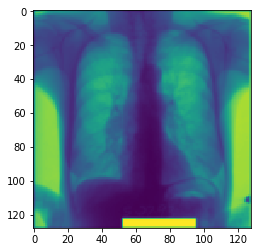

In [5]:
plt.imshow(np.reshape(Xtst[2][:][:][:],(128,128)))
print(np.reshape(Xtst[2][:][:][:],(128,128)))

In [4]:
#Build the model

#Libraries
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, Dropout,MaxPooling2D,UpSampling2D, Input, ELU, Concatenate, BatchNormalization
from keras.models import load_model
from keras.losses import categorical_crossentropy


In [5]:
# Model code

first_input = Input(shape =(128,128,1))
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(first_input)
conv1_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(bn)
conv1_2=Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv1_1)
dropout1 = Dropout(0.1)(conv1_2)
maxPool1 = MaxPooling2D(pool_size=2, strides=1)(dropout1)
conv2_1 = Conv2D(64, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool1)
conv2_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv2_1)
dropout2 = Dropout(0.1)(conv2_2)
maxPool2 = MaxPooling2D(pool_size=2, strides=1)(dropout2)
conv3_1 = Conv2D(32, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool2)
conv3_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv3_1)
dropout3 = Dropout(0.1)(conv3_2)
maxPool3 = MaxPooling2D(pool_size=2, strides=1)(dropout3)

conv4_1 = Conv2D(16, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool3)
conv4_2 = Conv2D(16, [3,3], strides=(1, 1), activation='elu', padding="same")(conv4_1)
dropout4 = Dropout(0.1)(conv4_2)

upSampling1 = UpSampling2D(size=(2, 2))(dropout4)

#concatenate
conv_int5 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling1)
concat1 = Concatenate()([dropout3, conv_int5])

conv5_1 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(concat1)
conv5_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv5_1)
dropout5 = Dropout(0.1)(conv5_2)
upSampling2 = UpSampling2D(size=(2, 2))(dropout5)
#concatenate
conv_int6 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling2)
concat2 = Concatenate()([dropout2, conv_int6])

conv6_1 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(concat2)
conv6_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv6_1)
dropout6 = Dropout(0.1)(conv6_2)
upSampling3 = UpSampling2D(size=(2, 2))(dropout6)

#concatenate
conv_int7 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling3)
concat3 = Concatenate()([dropout1, conv_int7])

conv7_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(concat3)
conv7_2 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv7_1)

dropout7 = Dropout(0.1)(conv7_2)

#batch normalization
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(dropout7)

output = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)
#output2 = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#weighting of the cost function for the different classes
print(Ytr.shape)
np.set_printoptions(threshold=np.inf)
import sklearn
from sklearn.utils.class_weight import compute_class_weight

Ytr2 = np.argmax(Ytr,3)

class0 = Ytr2 == 0
size0 = len(np.extract(class0, Ytr2))

class1 = Ytr2 == 1
size1 = len(np.extract(class1, Ytr2))

class2 = Ytr2 == 2
size2 = len(np.extract(class2, Ytr2))

class3 = Ytr2 == 3
size3 = len(np.extract(class3, Ytr2))

s = size1 + size2 + size3 + size0

weights = {'0' : np.ceil(size0/size0),
               '1' : np.ceil(size0/size1),
               '2' : np.ceil(size0/size2),
               '3' : np.ceil(size0/size3)}

#Sample Weights


sampleW = Ytr2 
sampleW[Ytr2== 1] = np.ceil(size0/size1)
sampleW[Ytr2== 0] = np.ceil(size0/size0) 
sampleW[Ytr2== 2] = np.ceil(size0/size2)
sampleW[Ytr2== 3] = np.ceil(size0/size3)

print(sampleW.shape)

print(size1,size2,size3,size0)


print(weights)

(198, 128, 128, 4)
(198, 128, 128)
198361 57055 607936 2380680
{'2': 42.0, '0': 1.0, '1': 13.0, '3': 4.0}


In [9]:
#adding the Dice coefficient 
from keras import backend as K

def loss_tot(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    dice = (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)
    return 1-dice+categorical_crossentropy(y_true, y_pred)                    


In [10]:
from keras.optimizers import Adam
#Load an existing model
model_name = 'inversenet.h5'
load_existant = False
#loss_weights = [0.5, 0.5]

if load_existant:
    model = load_model(model_name) 

else:

    model = Model(inputs=first_input, outputs=output)
    #model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0), loss=loss_tot, metrics=['acc'])
    model.compile(optimizer='Adadelta', loss=loss_tot, metrics=['acc'])
    model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 1)  4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 1280        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 128 147584      conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 

In [11]:
#data augmentation 

# we create two instances with the same arguments
data_gen_args = dict(zoom_range=0.01, horizontal_flip=True, vertical_flip = True, rotation_range = 10)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image should have rank 4
image_datagen.fit(Xtr, augment=True, seed=seed)
mask_datagen.fit(Ytr, augment=True, seed=seed)

image_generator = image_datagen.flow(Xtr,seed=seed)

mask_generator = mask_datagen.flow(Ytr,seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)




In [12]:
#Apply early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint

#https://medium.com/@tommytao_54597/use-tensorboard-in-google-colab-16b4bb9812a6
#tbc=TensorBoardColab()
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience = 100, verbose=0)
check_point = ModelCheckpoint('best_model_cloud_1000.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
#check_point = ModelCheckpoint('gdrive/My Drive/Deep Learning Project/best_model_100epochs.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [13]:
# Train the model, iterating on the data in batches of 50 samples
#model.fit(Xtr, Ytr, epochs=100, batch_size=50)
history = model.fit_generator(train_generator, validation_data = (Xva, Yva), verbose = 1, steps_per_epoch=10, epochs=1000, callbacks=[early_stopping,check_point]) #steps_per_epoch = data_size/n_batch

#history = model.fit_generator(train_generator, validation_data = (Xva, Yva), verbose = 1, steps_per_epoch=10, epochs=100, callbacks=[early_stopping,check_point,TensorBoardColabCallback(tbc)], class_weight = 'auto') #steps_per_epoch = data_size/n_batch
path_new_model = "cloud1000epochs.h5"
#path_new_model = "gdrive/My Drive/Deep Learning Project/100epochs.h5"
#history = model.fit(Xtr, Ytr, validation_data = (Xva, Yva), epochs=100, verbose = 1, batch_size=25, callbacks=[early_stopping, check_point,TensorBoardColabCallback(tbc)])
model.save(path_new_model)


#https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/1000
10/10 [==============================] - 25s 2s/step - loss: 1.3986 - acc: 0.3323 - val_loss: 0.9702 - val_acc: 0.6511

Epoch 00001: val_acc improved from -inf to 0.65106, saving model to best_model_cloud_1000.h5
Epoch 2/1000
10/10 [==============================] - 11s 1s/step - loss: 0.8409 - acc: 0.4213 - val_loss: 1.1417 - val_acc: 0.5536

Epoch 00002: val_acc did not improve from 0.65106
Epoch 3/1000
10/10 [==============================] - 10s 987ms/step - loss: 1.2992 - acc: 0.4366 - val_loss: 2.3114 - val_acc: 0.3764

Epoch 00003: val_acc did not improve from 0.65106
Epoch 4/1000
10/10 [==============================] - 11s 1s/step - loss: 0.9316 - acc: 0.4418 - val_loss: 1.8013 - val_acc: 0.6570

Epoch 00004: val_acc improved from 0.65106 to 0.65704, saving model to best_model_cloud_1000.h5
Epoch 5/1000
10/10 [==============================

10/10 [==============================] - 10s 987ms/step - loss: 0.3584 - acc: 0.6821 - val_loss: 0.4187 - val_acc: 0.8822

Epoch 00040: val_acc improved from 0.87995 to 0.88223, saving model to best_model_cloud_1000.h5
Epoch 41/1000
10/10 [==============================] - 11s 1s/step - loss: 0.3585 - acc: 0.7229 - val_loss: 0.3745 - val_acc: 0.8992

Epoch 00041: val_acc improved from 0.88223 to 0.89918, saving model to best_model_cloud_1000.h5
Epoch 42/1000
10/10 [==============================] - 10s 998ms/step - loss: 0.3483 - acc: 0.6969 - val_loss: 0.3853 - val_acc: 0.8204

Epoch 00042: val_acc did not improve from 0.89918
Epoch 43/1000
10/10 [==============================] - 11s 1s/step - loss: 0.3434 - acc: 0.7015 - val_loss: 0.3703 - val_acc: 0.8907

Epoch 00043: val_acc did not improve from 0.89918
Epoch 44/1000
10/10 [==============================] - 11s 1s/step - loss: 0.3616 - acc: 0.7021 - val_loss: 0.3711 - val_acc: 0.8073

Epoch 00044: val_acc did not improve from 0.89

10/10 [==============================] - 11s 1s/step - loss: 0.2562 - acc: 0.6780 - val_loss: 0.3087 - val_acc: 0.7937

Epoch 00125: val_acc did not improve from 0.92636
Epoch 126/1000
10/10 [==============================] - 10s 1s/step - loss: 0.2247 - acc: 0.6886 - val_loss: 0.3437 - val_acc: 0.7896

Epoch 00126: val_acc did not improve from 0.92636
Epoch 127/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2244 - acc: 0.6906 - val_loss: 0.2941 - val_acc: 0.8005

Epoch 00127: val_acc did not improve from 0.92636
Epoch 128/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2461 - acc: 0.7272 - val_loss: 0.2985 - val_acc: 0.9014

Epoch 00128: val_acc did not improve from 0.92636
Epoch 129/1000
10/10 [==============================] - 10s 986ms/step - loss: 0.2226 - acc: 0.7584 - val_loss: 0.3059 - val_acc: 0.8495

Epoch 00129: val_acc did not improve from 0.92636
Epoch 130/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2453 - ac

10/10 [==============================] - 11s 1s/step - loss: 0.2203 - acc: 0.7210 - val_loss: 0.2826 - val_acc: 0.8761

Epoch 00169: val_acc did not improve from 0.93090
Epoch 170/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2353 - acc: 0.7107 - val_loss: 0.2865 - val_acc: 0.9222

Epoch 00170: val_acc did not improve from 0.93090
Epoch 171/1000
10/10 [==============================] - 10s 989ms/step - loss: 0.2301 - acc: 0.6904 - val_loss: 0.2852 - val_acc: 0.9273

Epoch 00171: val_acc did not improve from 0.93090
Epoch 172/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2336 - acc: 0.7388 - val_loss: 0.2840 - val_acc: 0.8691

Epoch 00172: val_acc did not improve from 0.93090
Epoch 173/1000
10/10 [==============================] - 10s 988ms/step - loss: 0.2279 - acc: 0.7223 - val_loss: 0.2993 - val_acc: 0.8011

Epoch 00173: val_acc did not improve from 0.93090
Epoch 174/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2237 -

10/10 [==============================] - 11s 1s/step - loss: 0.2136 - acc: 0.7528 - val_loss: 0.2824 - val_acc: 0.9300

Epoch 00212: val_acc did not improve from 0.93227
Epoch 213/1000
10/10 [==============================] - 10s 988ms/step - loss: 0.2113 - acc: 0.7172 - val_loss: 0.2924 - val_acc: 0.8087

Epoch 00213: val_acc did not improve from 0.93227
Epoch 214/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2156 - acc: 0.7505 - val_loss: 0.2867 - val_acc: 0.8068

Epoch 00214: val_acc did not improve from 0.93227
Epoch 215/1000
10/10 [==============================] - 10s 988ms/step - loss: 0.2272 - acc: 0.7170 - val_loss: 0.3191 - val_acc: 0.9203

Epoch 00215: val_acc did not improve from 0.93227
Epoch 216/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2205 - acc: 0.7104 - val_loss: 0.3008 - val_acc: 0.9287

Epoch 00216: val_acc did not improve from 0.93227
Epoch 217/1000
10/10 [==============================] - 10s 999ms/step - loss: 0.227

10/10 [==============================] - 10s 987ms/step - loss: 0.2195 - acc: 0.6562 - val_loss: 0.2823 - val_acc: 0.8202

Epoch 00299: val_acc did not improve from 0.93430
Epoch 300/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2184 - acc: 0.7597 - val_loss: 0.2819 - val_acc: 0.8332

Epoch 00300: val_acc did not improve from 0.93430
Epoch 301/1000
10/10 [==============================] - 10s 999ms/step - loss: 0.1973 - acc: 0.6966 - val_loss: 0.2986 - val_acc: 0.9286

Epoch 00301: val_acc did not improve from 0.93430
Epoch 302/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2100 - acc: 0.7329 - val_loss: 0.2772 - val_acc: 0.9338

Epoch 00302: val_acc did not improve from 0.93430
Epoch 303/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2212 - acc: 0.6971 - val_loss: 0.2873 - val_acc: 0.9314

Epoch 00303: val_acc did not improve from 0.93430
Epoch 304/1000
10/10 [==============================] - 10s 989ms/step - loss: 0.220

10/10 [==============================] - 10s 996ms/step - loss: 0.2059 - acc: 0.6877 - val_loss: 0.2971 - val_acc: 0.7956

Epoch 00343: val_acc did not improve from 0.93430
Epoch 344/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2101 - acc: 0.6714 - val_loss: 0.2861 - val_acc: 0.8126

Epoch 00344: val_acc did not improve from 0.93430
Epoch 345/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2021 - acc: 0.7455 - val_loss: 0.2805 - val_acc: 0.8053

Epoch 00345: val_acc did not improve from 0.93430
Epoch 346/1000
10/10 [==============================] - 10s 987ms/step - loss: 0.2123 - acc: 0.6910 - val_loss: 0.2824 - val_acc: 0.8128

Epoch 00346: val_acc did not improve from 0.93430
Epoch 347/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2091 - acc: 0.6937 - val_loss: 0.2805 - val_acc: 0.9296

Epoch 00347: val_acc did not improve from 0.93430
Epoch 348/1000
10/10 [==============================] - 10s 989ms/step - loss: 0.201

10/10 [==============================] - 11s 1s/step - loss: 0.2024 - acc: 0.6679 - val_loss: 0.2833 - val_acc: 0.9323

Epoch 00387: val_acc did not improve from 0.93497
Epoch 388/1000
10/10 [==============================] - 10s 986ms/step - loss: 0.2115 - acc: 0.6824 - val_loss: 0.2780 - val_acc: 0.9344

Epoch 00388: val_acc did not improve from 0.93497
Epoch 389/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1995 - acc: 0.7053 - val_loss: 0.2786 - val_acc: 0.9350

Epoch 00389: val_acc did not improve from 0.93497
Epoch 390/1000
10/10 [==============================] - 10s 989ms/step - loss: 0.2067 - acc: 0.7449 - val_loss: 0.2931 - val_acc: 0.9328

Epoch 00390: val_acc did not improve from 0.93497
Epoch 391/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2055 - acc: 0.7433 - val_loss: 0.2866 - val_acc: 0.9358

Epoch 00391: val_acc improved from 0.93497 to 0.93581, saving model to best_model_cloud_1000.h5
Epoch 392/1000
10/10 [================

10/10 [==============================] - 11s 1s/step - loss: 0.2074 - acc: 0.7019 - val_loss: 0.2895 - val_acc: 0.8473

Epoch 00431: val_acc did not improve from 0.93581
Epoch 432/1000
10/10 [==============================] - 10s 989ms/step - loss: 0.2055 - acc: 0.7056 - val_loss: 0.2966 - val_acc: 0.8125

Epoch 00432: val_acc did not improve from 0.93581
Epoch 433/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1969 - acc: 0.7427 - val_loss: 0.2936 - val_acc: 0.9330

Epoch 00433: val_acc did not improve from 0.93581
Epoch 434/1000
10/10 [==============================] - 10s 998ms/step - loss: 0.1973 - acc: 0.7135 - val_loss: 0.2949 - val_acc: 0.9342

Epoch 00434: val_acc did not improve from 0.93581
Epoch 435/1000
10/10 [==============================] - 11s 1s/step - loss: 0.2052 - acc: 0.7433 - val_loss: 0.2920 - val_acc: 0.9334

Epoch 00435: val_acc did not improve from 0.93581
Epoch 436/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1990 -

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


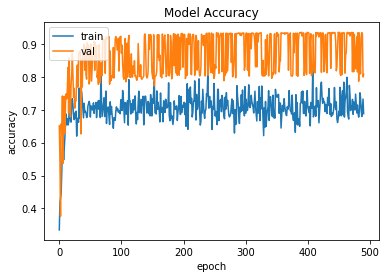

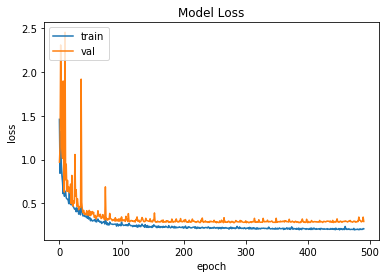

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Model_Accuracy_1000.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Model_Loss_1000.png')
plt.show()

In [15]:
#print(history.history['acc'])
#print(history.history['loss'])

In [13]:
# load the saved model
saved_model = load_model('best_model_cloud_1000.h5', custom_objects={'loss_tot': loss_tot})
#saved_model = load_model('gdrive/My Drive/Deep Learning Project/best_model.h5', custom_objects={'loss_tot': loss_tot})
# evaluate the model
train_loss, train_acc = saved_model.evaluate(Xtr, Ytr, verbose=0)
val_loss, val_acc = saved_model.evaluate(Xva, Yva, verbose=0)

print('Training metrics: Loss {0} Accuracy: {1}'.format(train_loss,train_acc))
print('Validation metrics: Loss {0} Accuracy: {1}'.format(val_loss,val_acc))

#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Training metrics: Loss 0.2122403819753666 Accuracy: 0.9617460616911301
Validation metrics: Loss 0.26856276392936707 Accuracy: 0.9495982527732849


In [36]:
#Test metrics
test_loss, test_acc = saved_model.evaluate(Xtst, Ytst, verbose=0)
print('Test metrics: Loss {0} Accuracy: {1}'.format(test_loss,test_acc))

#Test predictions
prediction = saved_model.predict(Xtst)


Test metrics: Loss 0.15082740783691406 Accuracy: 0.9767968654632568


In [37]:
print(prediction.shape)
print(Xtst.shape)
print(Ytst.shape)

(25, 128, 128, 4)
(25, 128, 128, 1)
(25, 128, 128, 4)


In [38]:
np.set_printoptions(threshold= np.inf)
print(np.reshape(Xtst[1][:][:][:],(128,128)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

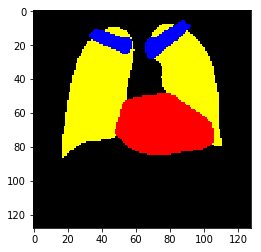

In [39]:
#Build our own color map

#import important libraries
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

#Define new colormap
colors = [(0, 0, 0),(1, 0, 0), (0, 0, 1), (1, 1, 0)]  # R -> G -> B
n_bins = [64, 64, 64, 64]  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# Plot result
plt.imshow(np.argmax(Ytst[3][:][:][:],2), cmap=cm)



(128, 128)


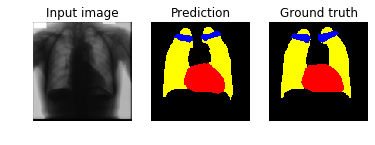

(128, 128)


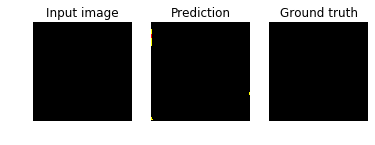

(128, 128)


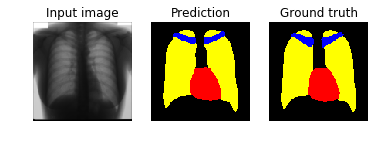

(128, 128)


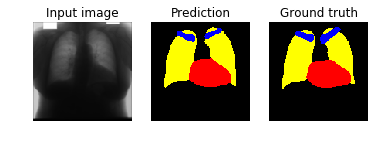

(128, 128)


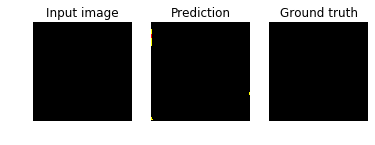

(128, 128)


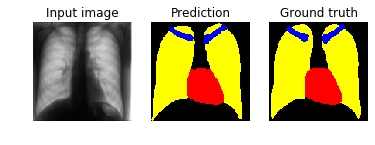

(128, 128)


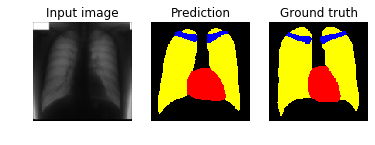

(128, 128)


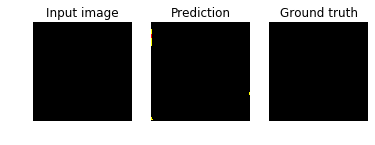

(128, 128)


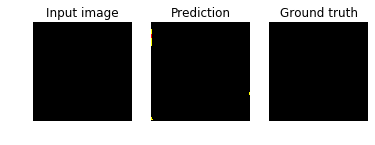

(128, 128)


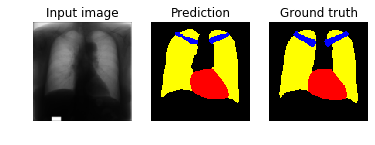

(128, 128)


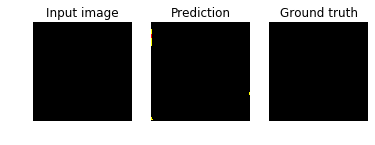

(128, 128)


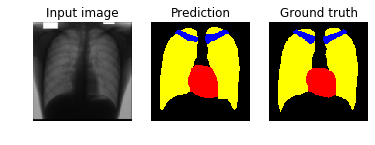

(128, 128)


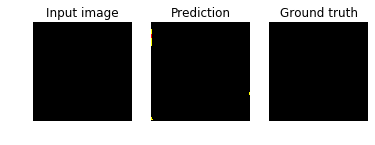

(128, 128)


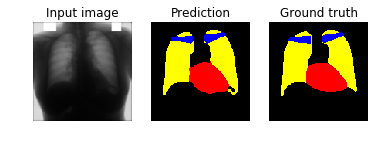

(128, 128)


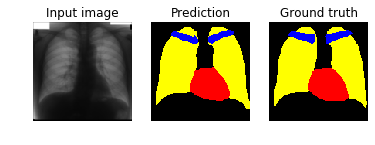

(128, 128)


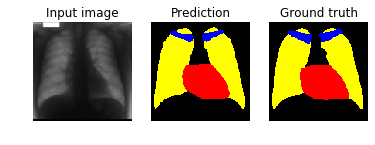

(128, 128)


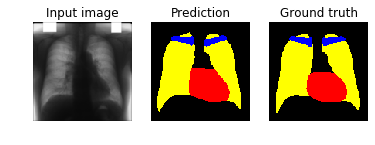

(128, 128)


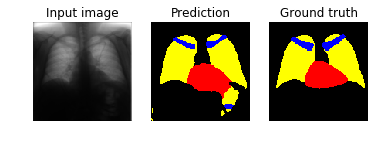

(128, 128)


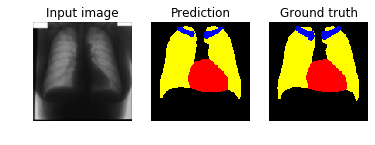

(128, 128)


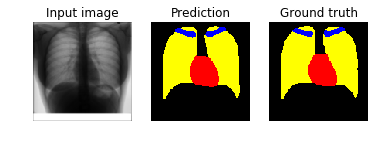

(128, 128)


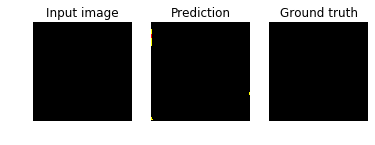

(128, 128)


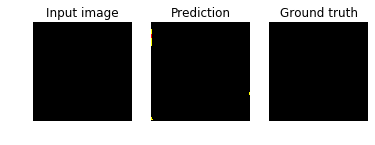

(128, 128)


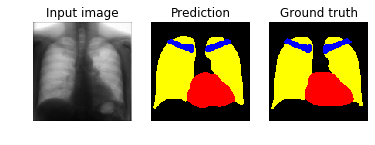

(128, 128)


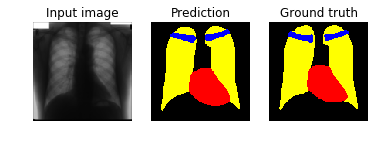

(128, 128)


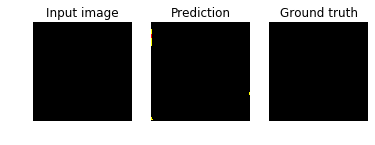

In [40]:
for i in range(len(prediction)):

    not_onehot_pred= np.argmax(prediction[i],2)
    print(not_onehot_pred.shape)
    
    #Plot
    fig = plt.figure("Result Comparison{0}".format(i))
    ax1 = fig.add_subplot(1,3,1)
    plt.title('Input image')
    plt.imshow(np.reshape(Xtst[i][:][:][:],(128,128)), cmap='gray')
    ax1.axis('off')
    ax1 = fig.add_subplot(1,3,2)
    plt.title('Prediction')
    plt.imshow(not_onehot_pred, cmap = cm)
    ax1.axis('off')
    ax1 = fig.add_subplot(1,3,3)
    plt.imshow(np.argmax(Ytst[i][:][:][:],2), cmap = cm)
    plt.title('Ground truth')
    #plt.suptitle('Comparison')
    plt.savefig('Prediction_1000epochs{0}.png'.format(i))
    ax1.axis('off')
    plt.show()


In [ ]:
# Obtain the performance
score = model.evaluate(Xtst, Ytst, batch_size=10)

In [ ]:
print(score)